<a href="https://colab.research.google.com/github/Heoquixote/Data_Scientist_Course/blob/main/Linear_Regression_(%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%EC%BD%94%EB%93%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sklearn

### 1. 데이터 불러오기

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)['frame']
# from sklearn.datasets import load_diabetes

# data = load_diabetes(as_frame=True)['frame']
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. EDA - 데이터 전처리


1) 결측치 확인


2) column에 dtype이 object가 있는지



3) target distribution -> 분류 / 회귀 문제인 경우.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


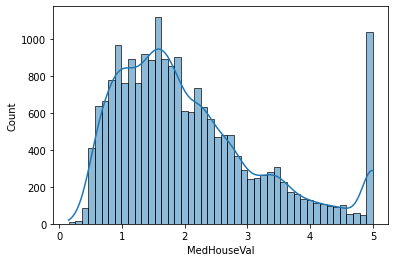

In [ ]:
#data.MedHouseVal.value_counts()
sns.histplot(data=data, x="MedHouseVal", kde=True)
#sns.histplot(data=data, x="target", kde=True)

### 3. 학습 데이터 준비 (data split)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["MedHouseVal"])   # feature vector
y = data.MedHouseVal                     # target value
# X = data.drop(columns="target")
# y = data.target

# 트테트테
# train : validation : test = 6 : 2 : 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,
                                                  random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


#### 4. Training

1) 학습 모델 함수를 불러옵니다.


2) 불러온 모델을 생성합니다.


3) 학습


4) 예측

In [ ]:
from sklearn.linear_model import LinearRegression  # 1

reg = LinearRegression() # 2
reg.fit(X_train, y_train) # 3

LinearRegression()

In [ ]:
reg.coef_ # w1, w2, w3, .... w10

array([ 4.55603516e-01,  9.51867573e-03, -1.34972463e-01,  8.62278742e-01,
       -8.39178933e-06, -3.69767511e-03, -4.16827258e-01, -4.29879849e-01])

In [ ]:
reg.intercept_ # b

-36.70412116142422

### 5. Evaluation


- training의 성능과 test의 성능의 비교해서 overfitting이 되지 않고, 잘 학습이 되었는지 확인합니다.


- 모델의 학습 성능을 평가합니다.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred_train = reg.predict(X_train)  # train data에 대한 예측값
pred_val = reg.predict(X_val)      # validation data에 대한 예측값
pred_test = reg.predict(X_test)    # test data에 대한 예측값

print("Train MSE : %.4f" % mean_squared_error(y_train, pred_train))
print("Validation MSE : %.4f" % mean_squared_error(y_val, pred_val))
print("Test MSE : %.4f" % mean_squared_error(y_test, pred_test))
print("Train R2 score : %.4f"  % r2_score(y_train, pred_train))
print("Validation R2 score : %.4f"  % r2_score(y_val, pred_val))
print("Test R2 score : %.4f"  % r2_score(y_test, pred_test))

Train MSE : 0.5144
Validation MSE : 0.5297
Test MSE : 0.5618
Train R2 score : 0.6117
Validation R2 score : 0.6142
Test R2 score : 0.5713
